## Preços de Imóveis de São Paulo

Dataset que mostra as informações de imóveis da cidade de São Paulo.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#try:
    #df = pd.read_csv("housing_sp_city.csv", sep=",", encoding='UTF-8')
    #print(df)
#except pd.errors.ParserError as e:
    #print("Erro de análise:", e)

Erro de análise: Error tokenizing data. C error: Expected 18 fields in line 31101, saw 19



In [3]:
df = pd.read_csv("housing_sp_city.csv", sep=",", encoding='UTF-8', skiprows=[31100], usecols=range(18))


C:\Users\nathi\AppData\Local\Temp\ipykernel_13060\3248305979.py:1: DtypeWarning: Columns (3,6,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("housing_sp_city.csv", sep=",", encoding='UTF-8', skiprows=[31100], usecols=range(18))


In [94]:
df.head(50)

,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
0,Rua Juvenal Galeno,53,Jardim da Saúde,4290030.0,NaN,Casa de dois andares,388.0,3.0,1.0,4.0,6.0,2017-02-07,Venda,700000.0,NaN,NaN,NaN,NaN
1,Rua Juruaba,16,Vila Santa Teresa (Zona Sul),4187320.0,NaN,Casa,129.0,2.0,1.0,3.0,2.0,2016-03-21,Venda,336000.0,NaN,NaN,NaN,NaN
2,Avenida Paulista,402,Bela Vista,1311000.0,NaN,Comercial,396.0,4.0,0.0,0.0,5.0,2018-12-18,Locação,24929.0,4900.0,MONTHLY,29829.0,4040.0
3,Rua Alvorada,1190,Vila Olímpia,4550004.0,80.0,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,Venda,739643.0,686.0,NaN,NaN,1610.0
4,Rua Curitiba,380,Paraíso,4005030.0,3322.0,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,Venda,7520099.0,6230.0,NaN,NaN,18900.0
5,Rua Pintassilgo,477,Vila Uberabinha,4514032.0,NaN,Flat,45.0,0.0,1.0,1.0,1.0,2018-10-09,Locação,1889.0,560.0,MONTHLY,2450.0,87.0
6,Rua Mateus Grou,586,Pinheiros,5415040.0,94.0,Apartamento,94.0,1.0,0.0,3.0,2.0,2018-05-29,Venda,630700.0,1120.0,NaN,NaN,489.0
7,Rua Dona Luísa de Paiva Dias,NaN,Vila Santa Clara,3274050.0,NaN,Condomínio,110.0,1.0,1.0,3.0,2.0,2018-04-16,Venda,385000.0,0.0,NaN,NaN,0.0
8,Rua Oswaldo Arouca,213,Vila Formosa,3363000.0,NaN,Depósito,590.0,2.0,0.0,0.0,20.0,2018-06-26,Venda,1400000.0,0.0,NaN,NaN,5600.0
9,Rua Almeida Torres,140,Aclimação,1530010.0,141.0,Apartamento,141.0,4.0,3.0,4.0,2.0,2019-01-09,Venda,1106000.0,0.0,NaN,NaN,0.0


In [5]:
df['cidade'] = df['cidade'].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133963 entries, 0 to 133962
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   logradouro       126961 non-null  object 
 1   numero           89820 non-null   object 
 2   bairro           133937 non-null  object 
 3   cep              128051 non-null  object 
 4   cidade           133959 non-null  object 
 5   tipo_imovel      133959 non-null  object 
 6   area_util        130863 non-null  object 
 7   banheiros        133046 non-null  float64
 8   suites           120342 non-null  float64
 9   quartos          130940 non-null  float64
 10  vagas_garagem    129534 non-null  float64
 11  anuncio_criado   133959 non-null  object 
 12  tipo_anuncio     133959 non-null  object 
 13  preco_venda      133959 non-null  object 
 14  taxa_condominio  117122 non-null  float64
 15  periodicidade    29052 non-null   object 
 16  preco_aluguel    28714 non-null   floa

In [78]:
# definindo a função para remover os caracteres especiais
#def remover_caracteres(nomes):
    #nomes = nomes.replace('á', 'a').replace('à', 'a').replace('â', 'a').replace('ã', 'a').replace('é', 'e').replace('ê', 'e').replace('ó', 'o').replace('ô', 'o').replace('õ', 'o').replace('ç', 'c')
    #return nomes

# chamando a função para corrigir os nomes da coluna Name
#df['cidade'] = df['cidade'].apply(remover_caracteres)

In [7]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133963 entries, 0 to 133962
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   logradouro       126961 non-null  object 
 1   numero           89820 non-null   object 
 2   bairro           133937 non-null  object 
 3   cep              128051 non-null  object 
 4   cidade           133959 non-null  object 
 5   tipo_imovel      133959 non-null  object 
 6   area_util        130863 non-null  object 
 7   banheiros        133046 non-null  float64
 8   suites           120342 non-null  float64
 9   quartos          130940 non-null  float64
 10  vagas_garagem    129534 non-null  float64
 11  anuncio_criado   133959 non-null  object 
 12  tipo_anuncio     133959 non-null  object 
 13  preco_venda      133959 non-null  object 
 14  taxa_condominio  117122 non-null  float64
 15  periodicidade    29052 non-null   object 
 16  preco_aluguel    28714 non-null   floa

In [53]:
df_cidade_sp = df[(df['cidade']=='São Paulo')&(df['bairro']!='Sumarezinho')&(df['tipo_imovel']=='Apartamento')]

In [51]:
df_ordenado_preco_aluguel = df_cidade_sp.sort_values(by='preco_aluguel', ascending=False).head(10)
df_ordenado_preco_aluguel

,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
125874,Rua Tucuna,930,Perdizes,5021010.0,São Paulo,Cobertura,270.0,1.0,3.0,3.0,3.0,2017-11-23,Locação,5600,1575000.0,MONTHLY,1580600.0,525.0
4659,Rua Campo Largo,NaN,Vila Bertioga,3186010.0,São Paulo,Depósito,NaN,0.0,0.0,0.0,5.0,2018-02-26,Locação,1190000.0,0.0,MONTHLY,1190000.0,0.0
17721,Avenida Magalhães de Castro,5194,Jardim Panorama,3178200.0,São Paulo,Escritório,10877.0,10.0,NaN,1.0,312.0,2018-11-08,Locação,532968.0,168417.0,MONTHLY,701386.0,0.0
83433,Avenida Brigadeiro Faria Lima,NaN,Faria Lima,03178200,São Paulo,Escritório,6451,0.0,0.0,0.0,155.0,2018-10-16,Locação,541918,85984.0,MONTHLY,627902.0,0.0
4322,Rua Henri Dunant,598,Chácara Santo Antônio (Zona Sul),4709110.0,São Paulo,Comercial,11168.0,20.0,0.0,0.0,0.0,2016-11-13,Locação,623000.0,NaN,MONTHLY,623000.0,NaN
5791,Rua Augusta,2559,Jardim Paulista,1413100.0,São Paulo,Escritório,7734.0,0.0,0.0,0.0,225.0,2018-08-17,Locação,541386.0,81207.0,MONTHLY,622594.0,0.0
15139,Avenida Guido Caloi,1001,Jardim São Luís,5802140.0,São Paulo,Depósito,9393.0,NaN,NaN,NaN,230.0,2019-02-20,Locação,473304.0,104977.0,MONTHLY,578282.0,23012.0
39597,Rua Augusta,2559,Jardim Paulista,1413100.0,São Paulo,Escritório,7074.0,0.0,0.0,0.0,207.0,2018-08-17,Locação,495205,74280.0,MONTHLY,569485.0,0.0
24921,Avenida Engenheiro Luís Carlos Berrini,1747,Itaim Bibi,4571010.0,São Paulo,Comercial,8748.0,53.0,0.0,0.0,175.0,2019-01-31,Locação,551140.0,0.0,MONTHLY,551140.0,50367.0
4435,Rua Jaguaré,NaN,Jaguaré,5344030.0,São Paulo,Depósito,NaN,0.0,0.0,0.0,0.0,2018-05-21,Locação,547764.0,0.0,MONTHLY,547764.0,0.0


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Perdizes'),
  Text(1, 0, 'Vila Bertioga'),
  Text(2, 0, 'Jardim Panorama'),
  Text(3, 0, 'Faria Lima'),
  Text(4, 0, 'Chácara Santo Antônio (Zona Sul)'),
  Text(5, 0, 'Jardim Paulista'),
  Text(6, 0, 'Jardim São Luís'),
  Text(7, 0, 'Itaim Bibi'),
  Text(8, 0, 'Jaguaré')])

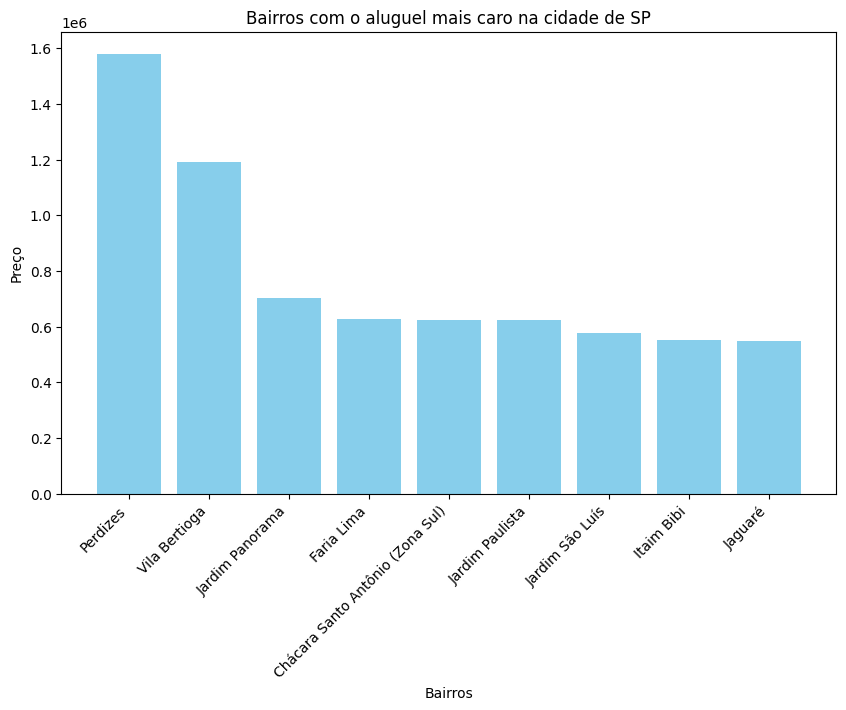

In [52]:
top10_bairros = df_ordenado_preco_aluguel.sort_values(by='preco_aluguel', ascending=False).head(10)

# Crie um gráfico de barras para os 3 canais com mais inscritos e seus países
plt.figure(figsize=(10, 6))
plt.bar(top10_bairros['bairro'], top10_bairros['preco_aluguel'], color='skyblue')
plt.xlabel('Bairros')
plt.ylabel('Preço')
plt.title('Bairros com o aluguel mais caro na cidade de SP')
plt.xticks(rotation=45, ha='right')

In [24]:
df_cidade_sp_barato = df[(df['cidade']=='São Paulo')&(df['preco_aluguel']!=0.0)&(df['tipo_imovel']=='Apartamento')]

In [26]:
df_ordenado_preco_aluguel2 = df_cidade_sp_barato.sort_values(by='preco_aluguel', ascending=True).head(10)
df_ordenado_preco_aluguel2

,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
75779,Rua João Antônio Andrade,996,Parque Boturussu,03805070,São Paulo,Apartamento,60,1.0,0.0,1.0,0.0,2018-06-26,Locação,454,0.0,MONTHLY,454.0,49.0
463,Rua João de Laet,NaN,Vila Aurora (Zona Norte),2410010.0,São Paulo,Apartamento,NaN,1.0,0.0,1.0,NaN,2018-10-08,Locação,385.0,105.0,MONTHLY,489.0,86.0
28835,NaN,NaN,Cidade Satelite Santa Barbara,5567080.0,São Paulo,Apartamento,NaN,1.0,0.0,1.0,0.0,2018-09-17,Locação,489.0,0.0,MONTHLY,489.0,38.0
114075,Rua João de Laet,NaN,Vila Aurora (Zona Norte),2410010.0,São Paulo,Apartamento,NaN,1.0,0.0,1.0,NaN,2018-10-08,Locação,420,87.0,MONTHLY,507.0,130.0
73266,Rua João de Laet,NaN,Vila Aurora (Zona Norte),02410010,São Paulo,Apartamento,NaN,1.0,0.0,1.0,NaN,2018-10-08,Locação,420,87.0,MONTHLY,507.0,135.0
1149,NaN,NaN,Vila Maria,NaN,São Paulo,Apartamento,NaN,1.0,0.0,1.0,NaN,2018-08-18,Locação,420.0,91.0,MONTHLY,510.0,0.0
121962,Rua Bartolomeu Bermejo,455,Casa Verde Alta,2565000.0,São Paulo,Apartamento,45.0,1.0,0.0,1.0,0.0,2018-05-08,Locação,525,0.0,MONTHLY,525.0,11.0
5710,NaN,NaN,Jardim Japao,NaN,São Paulo,Apartamento,NaN,1.0,0.0,1.0,NaN,2018-05-25,Locação,560.0,0.0,MONTHLY,560.0,14.0
100922,Avenida Júlio Buono,633,Vila Gustavo,2201001.0,São Paulo,Apartamento,24.0,1.0,0.0,1.0,0.0,2018-12-12,Locação,595,0.0,MONTHLY,595.0,16.0
100757,Rua André da Fonseca,286,Jardim Japão,2135010.0,São Paulo,Apartamento,35.0,1.0,0.0,1.0,0.0,2018-11-19,Locação,630,0.0,MONTHLY,630.0,70.0


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Parque Boturussu'),
  Text(1, 0, 'Vila Aurora (Zona Norte)'),
  Text(2, 0, 'Cidade Satelite Santa Barbara'),
  Text(3, 0, 'Vila Maria'),
  Text(4, 0, 'Casa Verde Alta'),
  Text(5, 0, 'Jardim Japao'),
  Text(6, 0, 'Vila Gustavo'),
  Text(7, 0, 'Jardim Japão')])

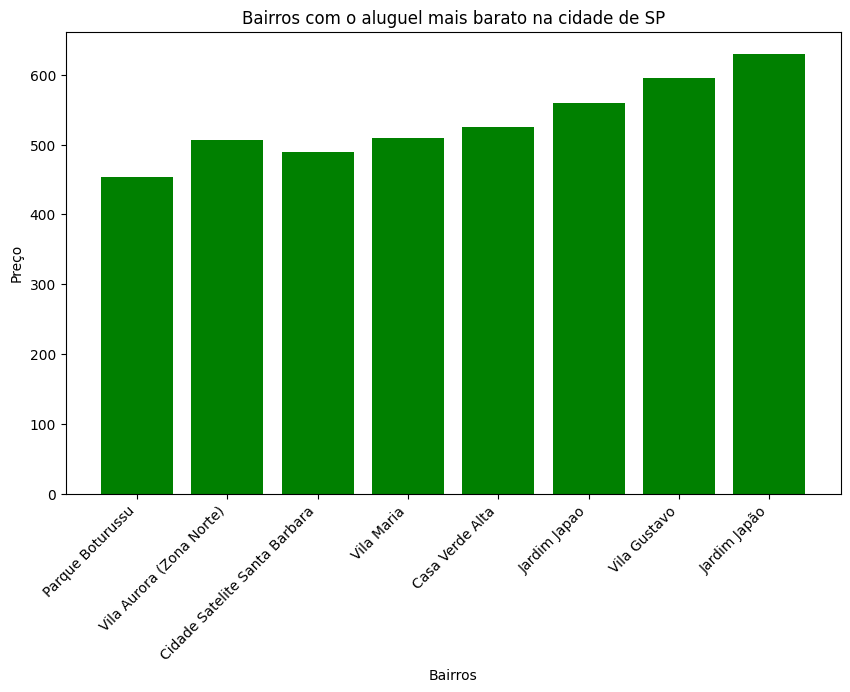

In [57]:
top10_bairros_baratos = df_ordenado_preco_aluguel2.sort_values(by='preco_aluguel', ascending=True).head(10)

# Crie um gráfico de barras para os 3 canais com mais inscritos e seus países
plt.figure(figsize=(10, 6))
plt.bar(top10_bairros_baratos['bairro'], top10_bairros_baratos['preco_aluguel'], color='green')
plt.xlabel('Bairros')
plt.ylabel('Preço')
plt.title('Bairros com o aluguel mais barato na cidade de SP')
plt.xticks(rotation=45, ha='right')

In [75]:
df_sp_dois_eixos = df[(df['cidade']=='São Paulo')&(df['bairro']!='Sumarezinho')&(df['tipo_imovel']=='Apartamento')
                      &(df['area_util']!='NaN')&(df['preco_aluguel']!='NaN')]

In [76]:
df_sp_dois_eixos.head(10)

,logradouro,numero,bairro,cep,cidade,tipo_imovel,area_util,banheiros,suites,quartos,vagas_garagem,anuncio_criado,tipo_anuncio,preco_venda,taxa_condominio,periodicidade,preco_aluguel,iptu_ano
3,Rua Alvorada,1190,Vila Olímpia,4550004.0,São Paulo,Apartamento,80.0,2.0,1.0,3.0,2.0,2018-10-26,Venda,739643.0,686.0,NaN,NaN,1610.0
4,Rua Curitiba,380,Paraíso,4005030.0,São Paulo,Apartamento,3322.0,5.0,4.0,4.0,5.0,2018-12-14,Venda,7520099.0,6230.0,NaN,NaN,18900.0
6,Rua Mateus Grou,586,Pinheiros,5415040.0,São Paulo,Apartamento,94.0,1.0,0.0,3.0,2.0,2018-05-29,Venda,630700.0,1120.0,NaN,NaN,489.0
9,Rua Almeida Torres,140,Aclimação,1530010.0,São Paulo,Apartamento,141.0,4.0,3.0,4.0,2.0,2019-01-09,Venda,1106000.0,0.0,NaN,NaN,0.0
10,Rua Alcantarilla,206,Vila Andrade,5717170.0,São Paulo,Apartamento,188.0,0.0,4.0,4.0,3.0,2018-09-29,Venda,910000.0,1400.0,NaN,NaN,6300.0
13,Rua João Guilherme,441,Vila Moinho Velho,4284000.0,São Paulo,Apartamento,69.0,2.0,0.0,2.0,1.0,2016-07-31,Venda,332500.0,339.0,NaN,NaN,819.0
15,Rua Araújo Gondim,NaN,Sacomã,4252040.0,São Paulo,Apartamento,50.0,1.0,0.0,2.0,1.0,2017-11-06,Venda,193200.0,322.0,NaN,NaN,NaN
16,Rua Manoel Carneiro Silva,01,Bosque da Saúde,4148050.0,São Paulo,Apartamento,64.0,2.0,1.0,2.0,2.0,2019-01-12,Venda,350000.0,406.0,NaN,NaN,118.0
17,Rua Coronel Ferreira Leal,159,Vila Gomes,5589090.0,São Paulo,Apartamento,55.0,1.0,0.0,2.0,1.0,2018-09-11,Venda,252629.0,244.0,NaN,NaN,644.0
21,Rua José Benedito Salinas,00,Jardim Marajoara,4674200.0,São Paulo,Apartamento,86.0,2.0,1.0,3.0,1.0,2019-01-18,Venda,406000.0,489.0,NaN,NaN,0.0


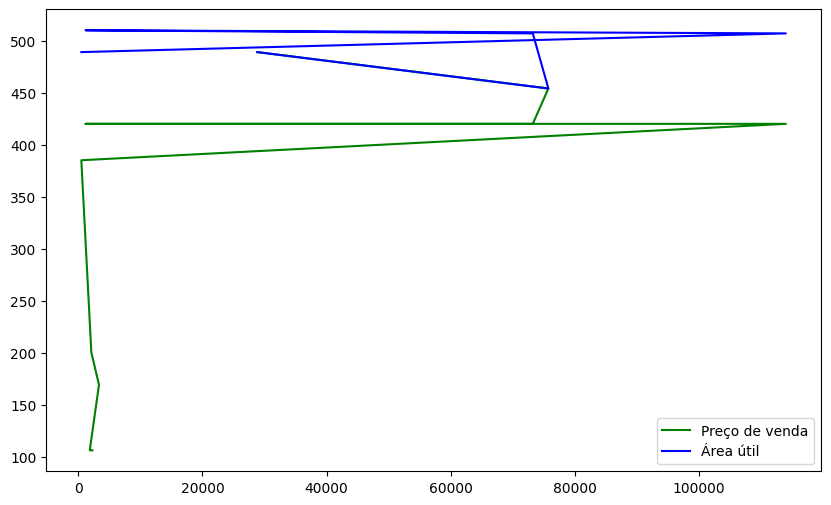

In [93]:
top10_bairros_venda = df_sp_dois_eixos.sort_values(by='preco_venda', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.plot(top10_bairros_venda['preco_venda'], label= 'Preço de venda', color='green')
plt.plot(top10_bairros_venda['preco_aluguel'], label= 'Área útil', color= 'blue')

plt.legend()

plt.show()



In [91]:
df_sp_dois_eixos['area_util'] = df_sp_dois_eixos['area_util'].astype('float64')
df_sp_dois_eixos['preco_venda'] = df_sp_dois_eixos['preco_venda'].astype('float64')

C:\Users\nathi\AppData\Local\Temp\ipykernel_13060\2136680179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_dois_eixos['area_util'] = df_sp_dois_eixos['area_util'].astype('float64')
C:\Users\nathi\AppData\Local\Temp\ipykernel_13060\2136680179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_dois_eixos['preco_venda'] = df_sp_dois_eixos['preco_venda'].astype('float64')


In [87]:
df_sp_dois_eixos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71527 entries, 3 to 133960
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   logradouro       68309 non-null  object 
 1   numero           48271 non-null  object 
 2   bairro           71514 non-null  object 
 3   cep              68690 non-null  object 
 4   cidade           71527 non-null  object 
 5   tipo_imovel      71527 non-null  object 
 6   area_util        71060 non-null  string 
 7   banheiros        71526 non-null  float64
 8   suites           65610 non-null  float64
 9   quartos          71527 non-null  float64
 10  vagas_garagem    70321 non-null  float64
 11  anuncio_criado   71527 non-null  object 
 12  tipo_anuncio     71527 non-null  object 
 13  preco_venda      71527 non-null  object 
 14  taxa_condominio  67791 non-null  float64
 15  periodicidade    8343 non-null   object 
 16  preco_aluguel    8082 non-null   float64
 17  iptu_ano        